#Titanic!

The Titanic data is used in the project. This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.


Dataset description:

survival:        Survival(0 = No; 1 = Yes)

pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name:            Name

sex:             Sex

age:             Age

sibsp:           Number of Siblings/Spouses Aboard

parch:           Number of Parents/Children Aboard

ticket:          Ticket Number

fare:            Passenger Fare

cabin:           Cabin

embarked:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

# 1. Questions
What are the factors that made peopel to survive. Three factors will be studied in following report
#### 1. Does gender has effect on the rate of survival.
#### 2. Does age has effect on the rate of survival.
#### 3. Does have at least one sibling aboard made people to survive.

# 2. What is the independent variable in the experiment?
Gender,
Age,
and whether a passenger has at lease one sibling

# 3. What is the dependent variable in the experiment?
Rate of survial


# 4. Import libraries



In [51]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from scipy import stats

# 5. Loading file

In [52]:
with open(r'C:\Users\ares han\Documents\Learning\Udacity\Titanic\titanic_data.csv', 'r') as f:
    titanic = pd.read_csv(f)

# 6. Inspect Data

## 6.1 Check table structure.

In [53]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S


## 6.2 Check data profile by describe() function

In [54]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the summary above, the value of age is in a reasonable range. There is no outliers for column 'age'

## 6.3 Check how many rows in dataframe

In [55]:
len(titanic)

891

## 6.4 Check if there are duplicates in PassengerId

In [56]:
titanic['PassengerId'].duplicated().sum()

0

## 6.5 Determine NaN values in each column.

In [57]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are NaN values in column Age which we will use to answer our question. Therefore, we will removed those rows before we start analysis

## 6.6 Check unique value for column 'Survived'. The reuslt looks good.

In [58]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

There is no outliers for column 'Survived'

## 6.7 Check unique value for column 'SibSp'. The reuslt looks good.

In [59]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

There is no outliers for column 'SibSp'

# 7.  Create individual dataset for each question, drop missing data and explore dataset 

We create individual dataset for each question to facility the analysis. Also, since we will drop rows with NaN values for age analysis, but we prefer to use the full dataset analyze other columns because there is no NaN value.

## 7.1 Dataset for the effect of Age

### 7.1.1 Create new dataset

In [60]:
titanic_age = titanic[['PassengerId','Survived','Age']].copy()
titanic_age.head(1)

,PassengerId,Survived,Age
0,1,0,22


#### check how many rows in the dataset

In [61]:
len(titanic_age)

891

### 7.1.2 Check Age distribution by histogram

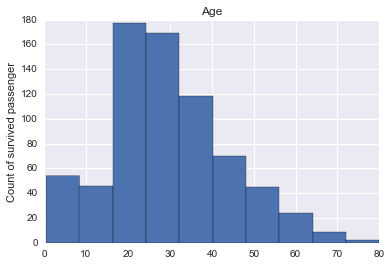

In [62]:
titanic_age[['Age']].hist(bins = 10)
plt.ylabel('Count of survived passenger')

Most of passengers were aged between 20s to 40s. And there is no outliers.

### 7.1.2 Drop rows with NaN Value for Age

According to previous investigation, there are NaN values in ages. We delete all rows with NaN value from dataframe.

In [63]:
titanic_age = titanic_age[titanic_age.Age.notnull()]
len(titanic_age)

714

177 rows were dropped

### 7.1.3 Check age distribution by looking at a box plot grouped by survived

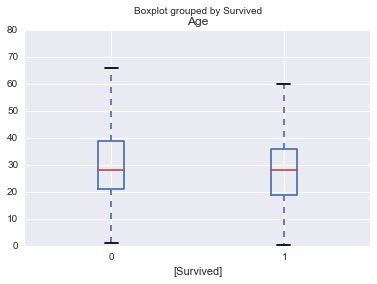

In [64]:
titanic_age[['Survived','Age']].boxplot(by = 'Survived')


As we can see above, the distribution of survived group is younger than not survived group.

### 7.1.4 Add a new column Age_Group to mark people who under 18(not include), between 18 and 60, and beyond 60(not include)

In [65]:
titanic_age['Age_Group'] = titanic_age.apply(lambda r: 'Children' if r.Age<18 else 'Adult' if (r.Age >= 18)&(r.Age<=60) else 'Elder', axis = 'columns')

titanic_age.head(2)

,PassengerId,Survived,Age,Age_Group
0,1,0,22,Adult
1,2,1,38,Adult


## 7.2 Dataset for effect of Sex

### 7.2.1 Create new dataset

In [66]:
titanic_sex = titanic[['PassengerId','Survived','Sex']].copy()
titanic_sex.head(1)

,PassengerId,Survived,Sex
0,1,0,male


Accoridng to output of step 'Inspect Data', there is no NaN value in column 'Sex'. So we done't need to drop any rows.

### 7.2.2 Check number of survived male against number of survived female by pie chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000213CD748>], dtype=object)

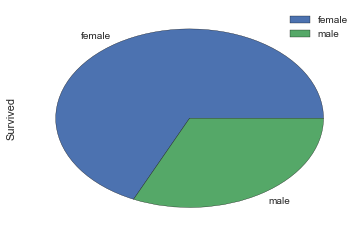

In [67]:
titanic_sex[['Survived','Sex']].groupby('Sex').sum().plot(kind = 'pie',subplots=True)

Accoridng to the pie chart above, there were more female survived.

## 7.3 Dataset for effect of whether has siblings

### 7.3.1 Create new dataset 

In [68]:
titanic_sibSp = titanic[['PassengerId','Survived','SibSp']].copy()
titanic_sibSp.head(1)

,PassengerId,Survived,SibSp
0,1,0,1


### 7.3.2 Add a new column to mark passenger who has at least one sibling aboard

In [69]:
titanic_sibSp['Has_SibSp'] = titanic_sibSp.apply(lambda r: 'Has_SibSp' if r.SibSp >= 1 else 'No_SibSp', axis = 'columns')

titanic_sibSp.head(1)

,PassengerId,Survived,SibSp,Has_SibSp
0,1,0,1,Has_SibSp


### 7.3.3 Check distribution of numbers of siblings grouped by Survived.

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


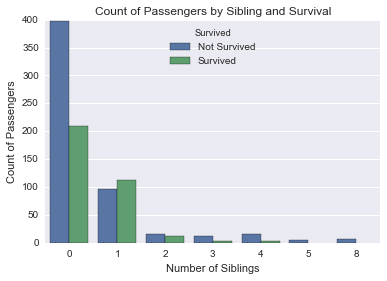

In [71]:
# I grouped by sibling and survived, then I chose PassengerId becasue the count() function doesn't count NaN value, so I choose a column without NaN value
group = titanic.groupby(['SibSp', 'Survived'], as_index = False)['PassengerId'].count()
#Swith Survived column from '0' and '1' to 'Survived' and 'Not Survived'
group['Survived'] = group.apply(lambda r: 'Survived' if r.Survived == 1 else 'Not Survived' , axis = 'columns')
p = sns.barplot(data = group, x = 'SibSp', y = 'PassengerId', hue = 'Survived')
# From that plot object, I add the labels and title
p.set(title = 'Count of Passengers by Sibling and Survival', xlabel = 'Number of Siblings', ylabel = 'Count of Passengers')

Since both survived and not survived people had similar amount of siblings, We can't identify any relation between survived and number of silibings by the chart above

# 8. Calculate rate of Survival

This section is used to calcuate survived rate grouped by factors 'sex', 'age' and 'whether has sibling'. Basically, this section prepares data for further data exploration.

## 8.1 Define a function to calculate survivved rate

The function below is used to calculate survived rate for the dataframe pass in using the source data group by nominated column

In [72]:
def calculate_survived_rate(survived_rate,source_data,groupby_column):
    '''survived_rate: is used as the container of survived rate
       source_data: is a dataframe which supply data to calculate survived rate
       groupby_column: is used as group by column when calculate survived rate    
    '''
    survived_rate['Survived'] = source_data.groupby(groupby_column).sum()['Survived']
    survived_rate['Passenger'] = source_data.groupby(groupby_column).count()['PassengerId']
    survived_rate.at['Total','Passenger'] = len(source_data)
    survived_rate.at['Total','Survived'] = source_data['Survived'].sum()
    survived_rate['Survived_Rate']= survived_rate.apply(lambda r: 100*float(r.Survived)/r.Passenger, axis = 'columns')
    return survived_rate

## 8.2 Calculate survived rate by age

In order to answer whether age has effect on survived rate, the folllowing code calculate the survived rate for different age groups and the whole sample. In the next section, by comparing the survived rate among different age group and the whole sample, we will be able to answer whetehr age has effect on survived rate.

In [73]:
survived_rate_age = pd.DataFrame(0,index= ['Children','Adult','Elder','Total'],columns=['Passenger','Survived','Survived_Rate'])
survived_rate_age = calculate_survived_rate(survived_rate_age,titanic_age,'Age_Group')
survived_rate_age

,Passenger,Survived,Survived_Rate
Children,113,61,53.982301
Adult,579,224,38.687392
Elder,22,5,22.727273
Total,714,290,40.616246


## 8.3 Calculate survived rate by sex

The code below is to calculate the survived rate for different sex and the whole sample. In the next section, by comparing the survived rate among different sex and the whole sample, we will be able to answer whetehr sex has effect on survived rate.

In [74]:
survived_rate_sex = pd.DataFrame(0,index= ['male','female','Total'],columns=['Passenger','Survived','Survived_Rate'])
survived_rate_sex = calculate_survived_rate(survived_rate_sex,titanic_sex,'Sex')
survived_rate_sex

,Passenger,Survived,Survived_Rate
male,577,109,18.890815
female,314,233,74.203822
Total,891,342,38.383838


## 8.4 Calculate survived rate by has_siblings

The code below is to calculate the survived rate for two groups of people. The first group of people had sibling on aboard and the second group of people didn't have sibling aboard. In the next section, by comparing the survived rate among groups of whether had sibling aboard and the whole sample, we will be allowed to know whetehr having sibling aboard has effect on survived rate.

In [75]:
titanic_sibSp
survived_rate_sibSp = pd.DataFrame(0,index= ['Has_SibSp','No_SibSp','Total'],columns=['Passenger','Survived','Survived_Rate'])
survived_rate_sibSp = calculate_survived_rate(survived_rate_sibSp,titanic_sibSp,'Has_SibSp')
survived_rate_sibSp

,Passenger,Survived,Survived_Rate
Has_SibSp,283,132,46.643110
No_SibSp,608,210,34.539474
Total,891,342,38.383838


# 9. Explore data by visualization

## 9.1 Visualization for survived rate by age

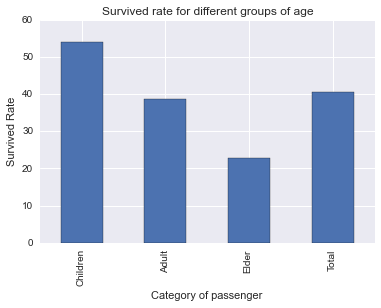

In [76]:
survived_rate_age['Survived_Rate'].transpose().plot(kind='bar', title='Survived rate for different groups of age')
plt.ylabel('Survived Rate')
plt.xlabel('Category of passenger')

Accoridng to the bar chart above, the factor age has an effect on survived rate

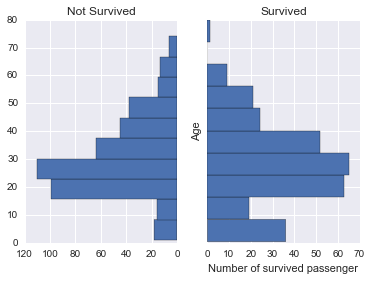

In [77]:
y = range(81)
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].hist(list(titanic_age[['Age','Survived']].groupby('Survived').get_group(0)['Age'].values),bins = 10 , orientation ='horizontal')
axes[0].set_title('Not Survived')
axes[1].hist(list(titanic_age[['Age','Survived']].groupby('Survived').get_group(1)['Age'].values),bins = 10 , orientation ='horizontal'  )
axes[1].set_title('Survived')
axes[0].invert_xaxis()
plt.xlabel('Number of survived passenger')
plt.ylabel('Age')

## 9.2 Visualization for survived rate by sex¶

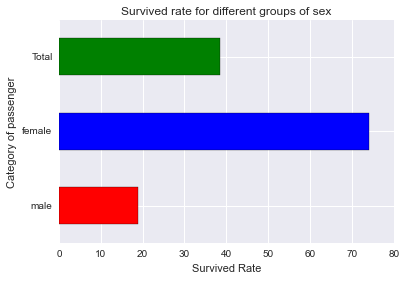

In [78]:
survived_rate_sex['Survived_Rate'].transpose().plot(kind='barh', title='Survived rate for different groups of sex',color = ['r','b','g'])
plt.ylabel('Category of passenger')
plt.xlabel('Survived Rate')

Accoridng to the bar chart above, the factor sex has an effect on survived rate

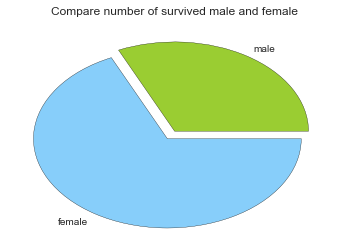

In [79]:
survived_rate_sex[0:2]['Survived'].transpose().plot(kind='pie',colors=['yellowgreen','lightskyblue'],explode=(0,0.1),title='Compare number of survived male and female')
plt.ylabel('')

More female survived in this accident.

## 9.3 Visualization for survived rate by siblings

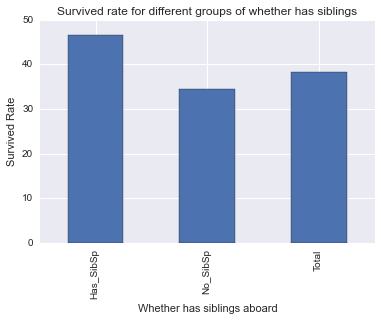

In [80]:
survived_rate_sibSp['Survived_Rate'].transpose().plot(kind='bar', title='Survived rate for different groups of whether has siblings')
plt.ylabel('Survived Rate')
plt.xlabel('Whether has siblings aboard')

Accoridng to the bar chart above, it's hard to tell if has at least sibling aboard really made people to survive.

# 10. Hypothesis test for whether gender has an effect on survivability

Purpose of this hypothesis test is to determine whether gender is related to survivablity.

## 10.1 Variables in hypothesis test 

The Independent variable is gender: male or female

The dependent variable is survivablity

## 10.2 Set of hypotheses for this task.

Chi-square test for independence will be used to determine dependency of variables in this hypothesis test.

Conditions of using Chi-square test for independence:

#### 1. The sampling method is simple random sampling.

The 891 passengers were extracted by simple random sampling from 2224 passengers and crew on board the Titanic

#### 2. The variables under study are each categorical.

Both gender and survivability are categorical variable

#### 3. If sample data are displayed in a contingency table, the expected frequency count for each cell of the table is at least 5.

As we can see from the contigency table below, the expected frequency count for each cell of the table is at least 5

## 10.3 Hypothesis Statement

### 10.3.1 Research Question:

Does gender have effect on the survivability.

### 10.3.2  Null hypothesis:

Knowing the gender of a passenger does not help you predict the survivability of this passenger.

H0: Gender and survivability are independent

### 10.3.3 Alternative hypothesis:

Knowing the gender of a passenger can help you predict the survivability of this passenger.

Ha: Gender and survivability are dependent

## 10.4 Analysis Plan

### 10.4.1 Significance level

0.05 will be used as the significance level 

### 10.4.2 Test method

chi-square test for independence is used to determine whether there is a significant relationship between gender and survivability

## 10.5 Analyze sample data

### 10.5.1 Degrees of freedom

DF = (Level of gender - 1)*(Level of survivability - 1) = (2-1)*(2-1) = 1

### 10.5.2 Calculate expected frequencies

In order by calculate expected frequencies, we need prepare a contigency table

#### 10.5.2.1 contingency table 

In [81]:
contingency_table_sex = survived_rate_sex[['Passenger','Survived']]
contingency_table_sex['Not_Survived'] = survived_rate_sex['Passenger'] - survived_rate_sex['Survived']
contingency_table_sex['Row_Total'] = survived_rate_sex['Passenger']
del  contingency_table_sex['Passenger']
contingency_table_sex = contingency_table_sex.rename(index = {'Total':'Column_Total'})
contingency_table_sex

,Survived,Not_Survived,Row_Total
male,109,468,577
female,233,81,314
Column_Total,342,549,891


#### 10.5.2.2 Expected frequencies

In [82]:
expected_frequencies = pd.DataFrame(0,index = ['male','female'],columns = ['Survived','Not_Survived'])
expected_frequencies
expected_frequencies.loc['male','Survived'] = contingency_table_sex.at['male','Row_Total'] * contingency_table_sex.at['Column_Total','Survived']/ contingency_table_sex.at['Column_Total','Row_Total']
expected_frequencies.loc['male','Not_Survived'] = contingency_table_sex.at['male','Row_Total'] * contingency_table_sex.at['Column_Total','Not_Survived']/ contingency_table_sex.at['Column_Total','Row_Total']
expected_frequencies.loc['female','Survived'] = contingency_table_sex.at['female','Row_Total'] * contingency_table_sex.at['Column_Total','Survived']/ contingency_table_sex.at['Column_Total','Row_Total']
expected_frequencies.loc['female','Not_Survived'] = contingency_table_sex.at['female','Row_Total'] * contingency_table_sex.at['Column_Total','Not_Survived']/ contingency_table_sex.at['Column_Total','Row_Total']

expected_frequencies

,Survived,Not_Survived
male,221.474747,355.525253
female,120.525253,193.474747


### 10.5.3 Test statistic

The test statistic is a chi-square random variable (Χ2) defined by the following equation.

Χ2 = Σ [ (Or,c - Er,c)2 / Er,c ]

In [83]:
((contingency_table_sex[0:2][['Survived','Not_Survived']] - expected_frequencies ) ** 2 / expected_frequencies).sum().sum()

263.05057407065567

x2 equals to 263.05057407065567

### 10.5.4 P-value

Calculate P-value by function in scipy

In [84]:
1.0 - stats.chi2.cdf(263.05057407065567,1)

0.0

0 is the probability of observing a sample statistic as extreme as the test statistic

## 10.6 Interpret results

Since the P-value (0) is less than the significance level (0.05), we reject the null hypothesis in favour of alternative hypothesis which means there is a relationship between gender and survivability.

# 11. Conclusion

##  11.1 Does gender has effect on the rate of survival.

### 11.1.1 Gender/sex has effect on the rate of survival.
Accoridng to the analysis above, gender is related to suvivability.

### 11.1.2 Limitions on the analysis
The conclusion is limited becasue following reasons:
#### 1. The difference of survived might be caused by other facotrs. For example, the majority of survived female could be young people who had a better chance to be survived according to the analysis for survived rate of age.
#### 2. The conclusion was made on the data of 891 of the 2224 passengers, which means we made the conclusion by a sample of the whole population. Using a sample may cause bias in our conclusion.


##  11.2. Does age has effect on the rate of survival.

### 11.2.1 Age has effect on the rate of survival.
Accoridng to the analysis above, younger people's survived rate was higher than old people's survived rate obviousely.

### 11.2.2 Limitions on the analysis
The conclusion is limited becasue following reasons:
#### 1. Hypothesis test is not used in analysis. We can only see the difference of survived rate between age groups, but we can't prove there is a significant different.
#### 2. The conclusion was made on the data of 891 of the 2224 passengers, which means we made the conclusion by a sample of the whole population. Using a sample may cause bias in our conclusion.
#### 3. The difference of survived might be caused by other facotrs. For example, the majority of survived children could be female  who had a better chance to be survived according to the analysis for survived rate of gender/sex.



##  11.3. Does have at least one sibling aboard made people to survive.


### 11.2.1 Age has effect on the rate of survival.
Accoridng to the analysis above, we can not say the differences of survival rate between passsenger who has at least one sibling aboard and passenger who doesn't have sibling on aboard don't seem to be significant.

### 11.2.2 Limitions on the analysis
The conclusion is limited becasue following reasons:

#### 1. The conclusion was made on the data of 891 of the 2224 passengers, which means we made the conclusion by a sample of the whole population. Out conclusion may only due to the chance.



# 11. Reference

## 11.1 The dataset 'Titanic' was obtained from website 'Kaggle'

## 11.2 The hypothesis test 'Chi-Square Test for Independence' was referred from http://stattrek.com/